In [23]:
import numpy as np
import xarray as xr
import datetime

import FourierOpticsLib as FO

import matplotlib.pyplot as plt

In [50]:
Nsets = 1  # number of training images to generate
wavelength = 355e-9
amplitude_th = 0.05  # mean fraction of zero pixels
zmiss = 1  # value for when amplitude is zero
rspot = 10e-6

# set the randomized space limits
param_lim = {'z':[-10e-3,0],
             'amplitude':[0,1]}

# set the size of the image
image_dim = {'x':128,
             'y':256,
             'pixel_width':3e-6}


In [79]:
# initialize plane wave definition
grid = FO.Coordinate_Grid(((image_dim['y'],image_dim['x'],),
                           (image_dim['pixel_width'],image_dim['pixel_width'],))
                           ,inputType='ccd')
E0 = FO.Efield(wavelength,grid,z=np.min(param_lim['z']))

OpticalTF = E0.grid.fr < 1/rspot

In [76]:
E0.grid.fr.max()*wavelength

0.08367430244040812

In [66]:
"""
Generate pixel input data
loop
"""
adata = (np.random.rand(image_dim['x'],image_dim['y']) > amplitude_th).astype(float)  # force amplitude data to be binary
zdata = np.random.rand(image_dim['x'],image_dim['y'])*(param_lim['z'][1]-param_lim['z'][0])+param_lim['z'][0]
zdata[adata==1] = zmiss  # null zdata where there is no amplitude term

In [88]:
ipix = np.argsort(zdata.flatten())
ipix = np.delete(ipix,np.nonzero(adata.flatten()==1)[0])
ix,iy = np.meshgrid(np.arange(image_dim['x']),np.arange(image_dim['y']))
ix = ix.ravel()
iy = iy.ravel()

In [81]:
for i in ipix:
    if adata[ix[i],iy[i]] != 1:
        E0.propagate_to(zdata[ix[i],iy[i]])
        E0.field[ix[i],iy[i]] *= adata[ix[i],iy[i]]
        E0.spatial_filter(OpticalTF)

In [82]:
Idet = np.abs(E0.field)**2

In [90]:
ipix.size

1622

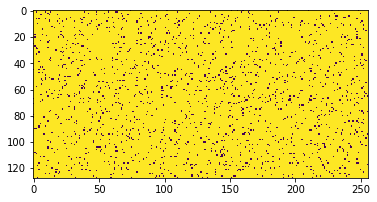

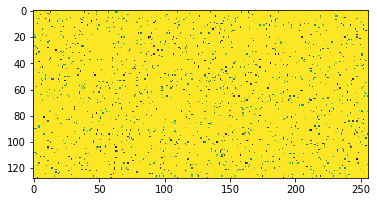

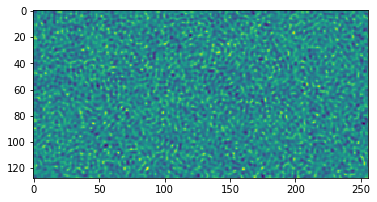

In [83]:
plt.figure()
plt.imshow(adata)

plt.figure()
plt.imshow(zdata)
plt.clim(param_lim['z'])


plt.figure()
plt.imshow(Idet)

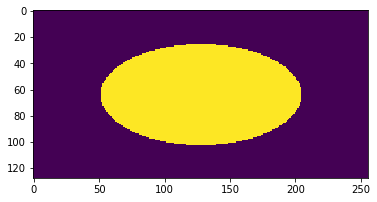

In [80]:
plt.figure()
plt.imshow(OpticalTF)